<a href="https://colab.research.google.com/github/emrullahozkilinc/patika-dev/blob/main/Depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
conditions = []
for x in range(1,24):
  conditions.append(pd.read_csv('https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/the_depression_dataset/condition/condition_%s.csv'%(x)))

controls = []
for x in range(1,33):
  controls.append(pd.read_csv('https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/the_depression_dataset/control/control_%s.csv'%(x)))

scores = pd.read_csv('https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/the_depression_dataset/scores.csv')

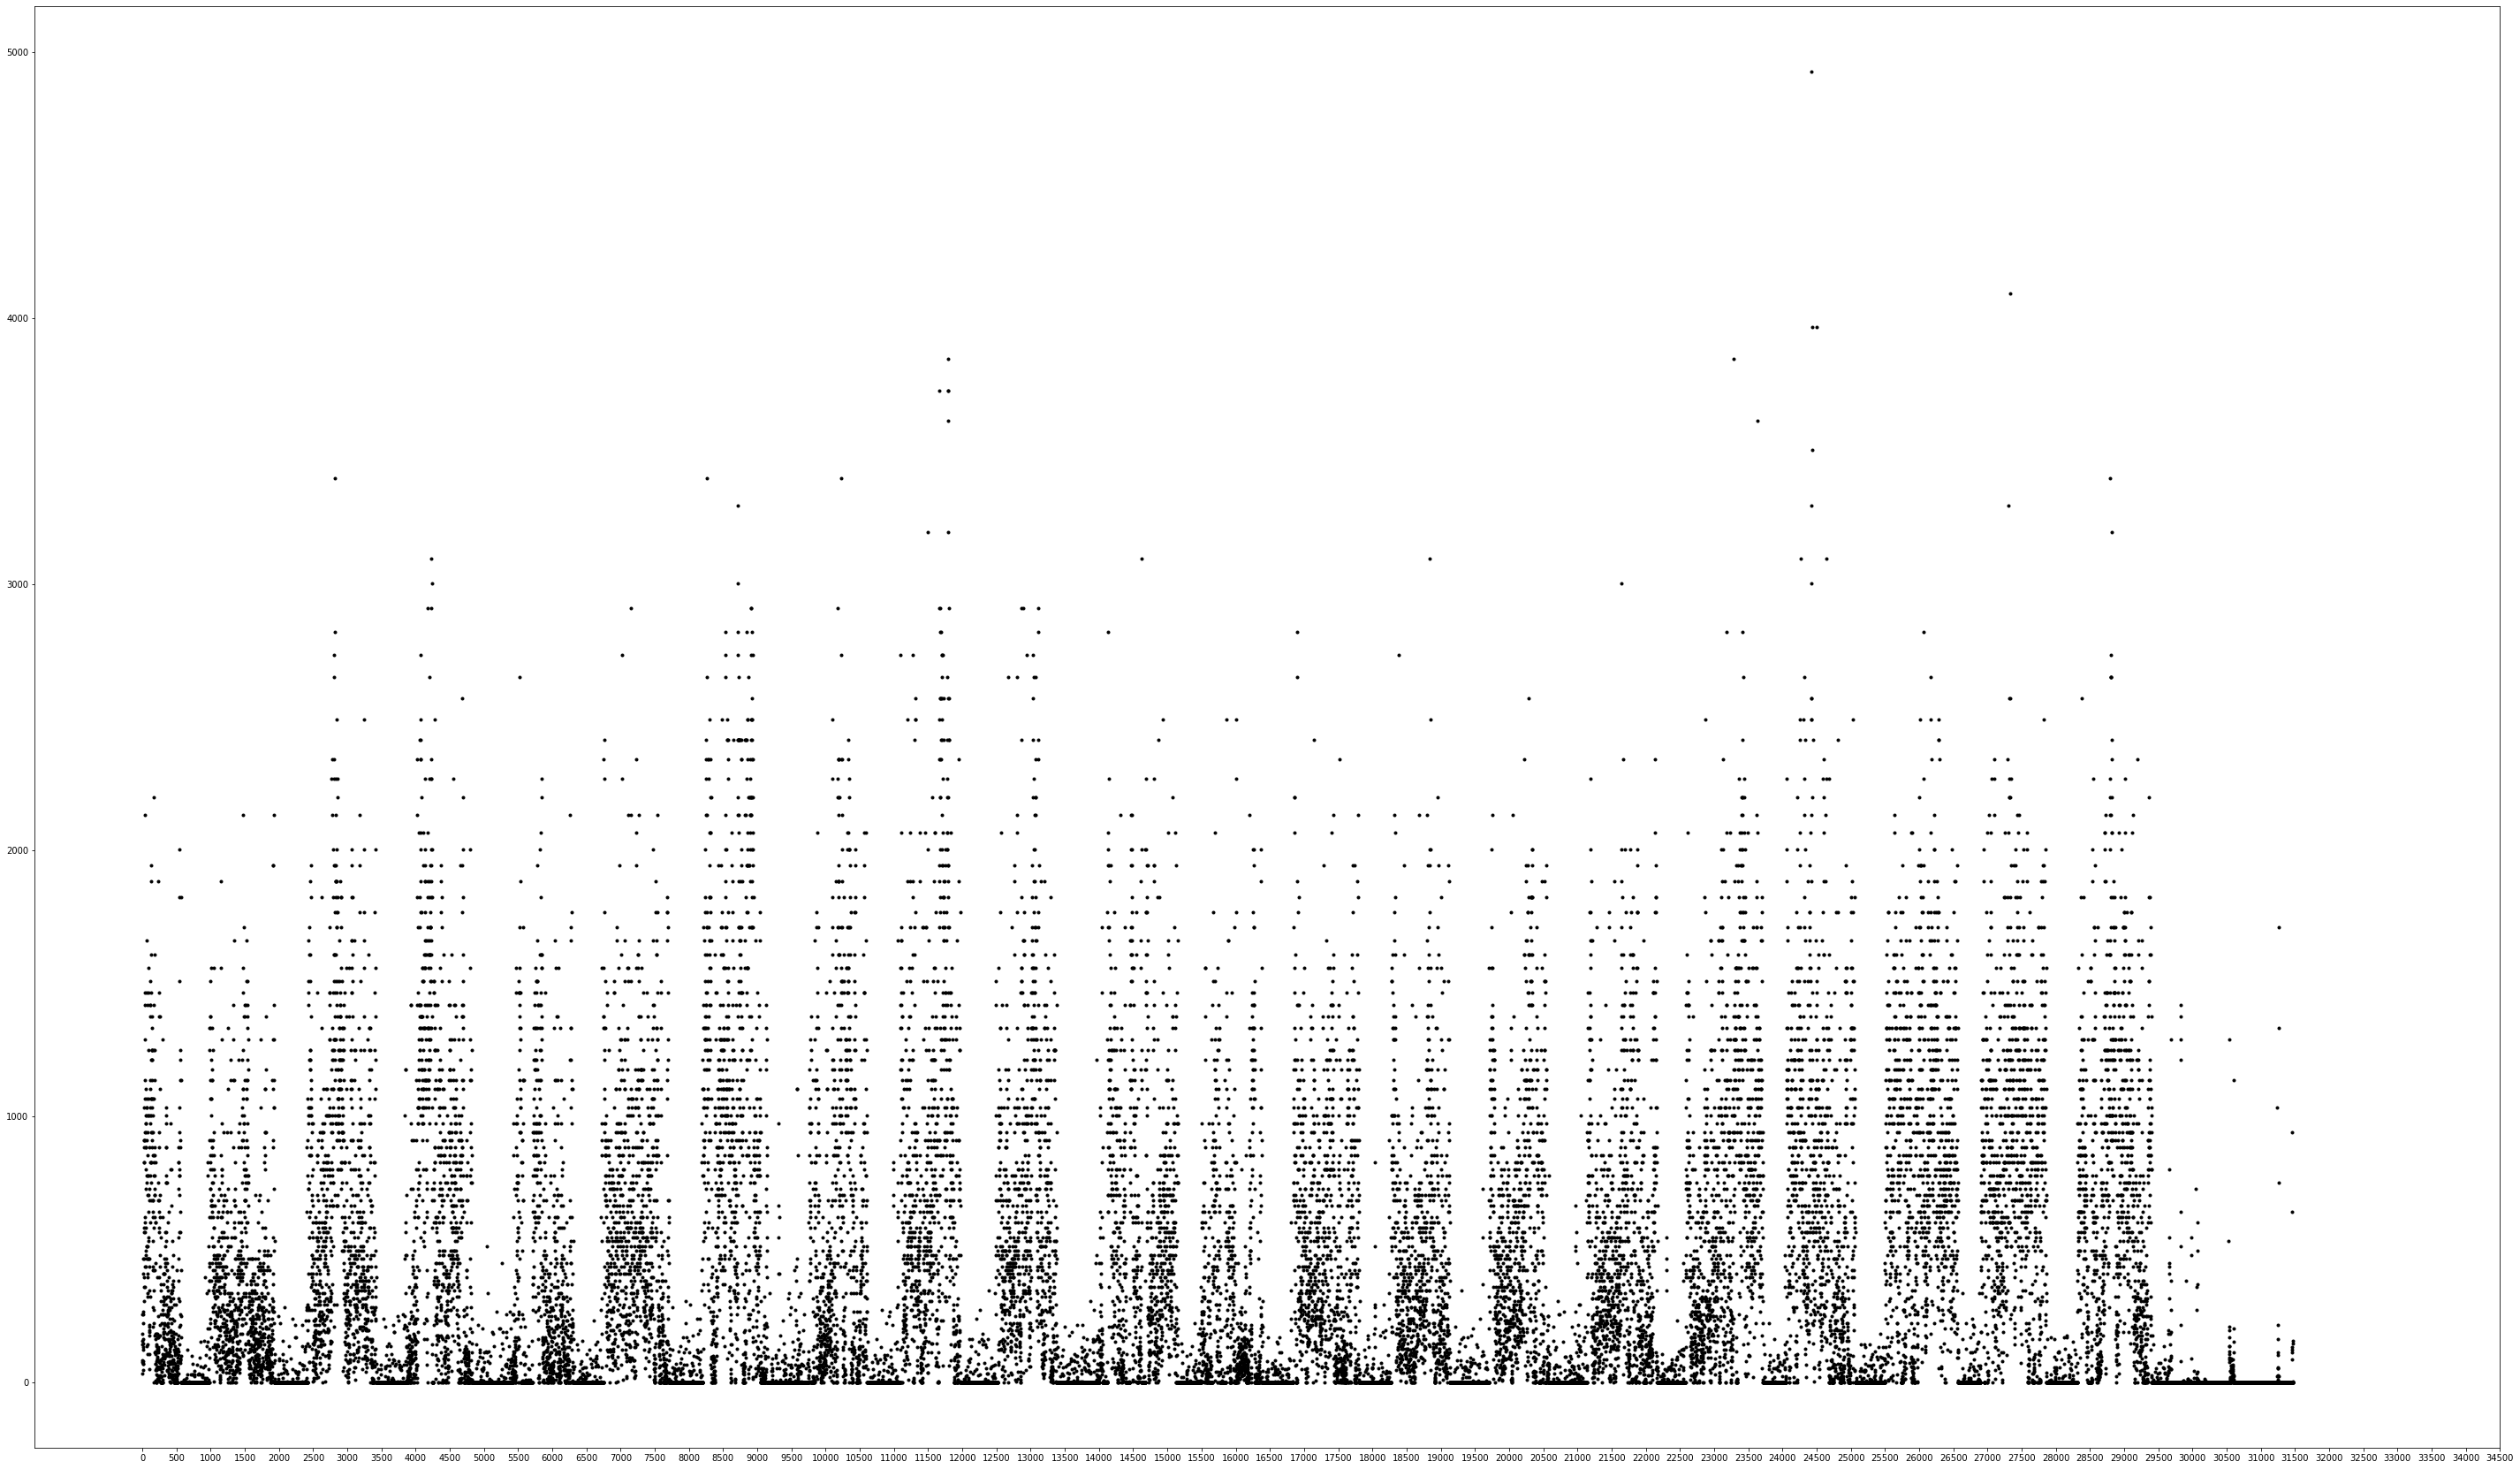

In [5]:
fig,ax = plt.subplots(figsize = (50,30))
controls[1]['activity'].plot(style = 'k.')
ax.set_xticks(range(0,35000,500))

In [6]:
controls[1].loc[controls[1]['activity']<=20].groupby('activity', axis = 0)['activity'].count()

activity
0     11324
3       164
5        80
7        50
8        87
10       69
12       54
13       80
15       63
17       65
18       49
20       58
Name: activity, dtype: int64

<BarContainer object of 55 artists>

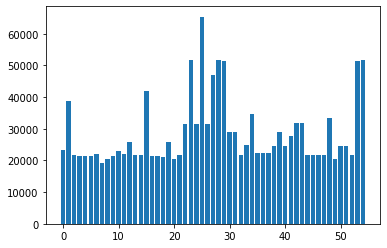

In [7]:
all_sizes = []
for x in conditions:
  all_sizes.append(len(x))

for x in controls:
  all_sizes.append(len(x))

plt.bar(range(len(all_sizes)), all_sizes)

**Verilerin 400'ün katına getirilmesi için fazlalıkların çıkarılması**

In [16]:
controls_shapes = [x.shape[0] for x in controls]
split_size = 400
reshaped_controls = []
for n,x in enumerate(controls_shapes):
  to_split_n = (controls_shapes[n]%400)
  reshaped_controls.append(controls[n].iloc[:-to_split_n,:])

**Her verinin 400 timestamp'e eşitlenmesi**

In [23]:
resized_data = {}
for x,y in enumerate(reshaped_controls):
  new_shape = int(y.shape[0]/400)
  dfs = {}
  for z in range(1,401):
    mean = y[new_shape*(z-1):new_shape*z]['activity'].mean()
    dfs[z] = mean 
  resized_data[x] = dfs

In [ ]:
'''
for m,i in enumerate(controls_cp):
  for n,j in enumerate(scores.columns):
    i[j] = scores.iloc[m,n]
'''

In [ ]:
'''
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(3,1)))
model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
'''